In [ ]:
!git clone https://github.com/hungthanhpham94/GRU4REC-pytorch.git

Cloning into 'GRU4REC-pytorch'...
remote: Enumerating objects: 166, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 166 (delta 0), reused 0 (delta 0), pack-reused 162
Receiving objects: 100% (166/166), 75.41 KiB | 6.28 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/events.csv")

In [ ]:
df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


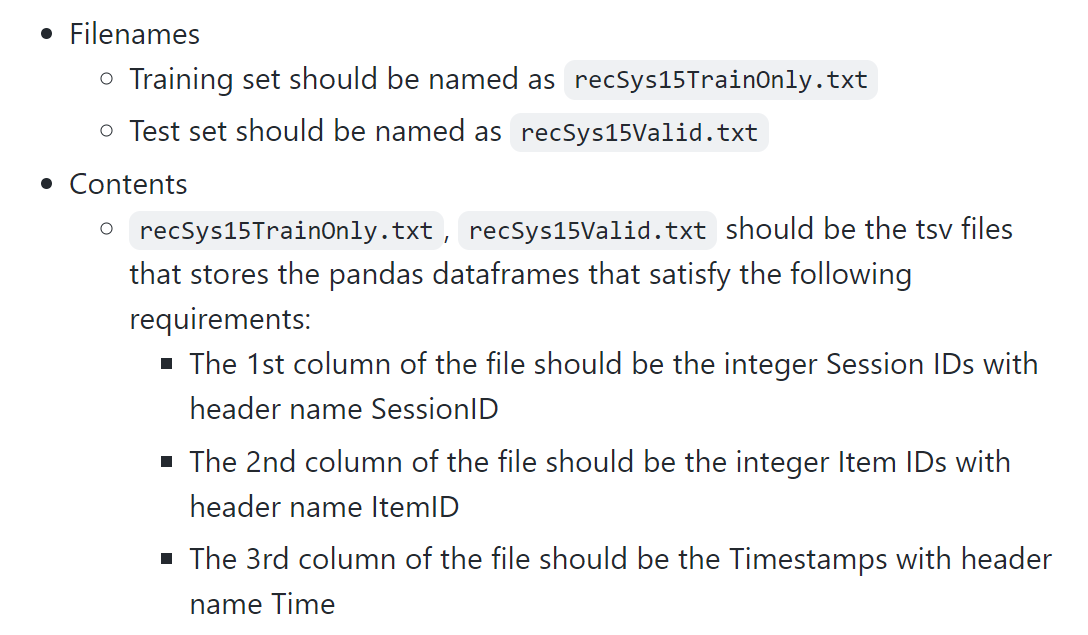

session id ==> user id

item id ==> item id

time stamp ==> time 

we will work on view event only 

In [ ]:
df.drop(inplace=True , columns="transactionid")

In [ ]:
df["event"].value_counts()

view           2664312
addtocart        69332
transaction      22457
Name: event, dtype: int64

In [ ]:
df = df[df["event"] == "view" ]

In [ ]:
df["event"].value_counts()

view    2664312
Name: event, dtype: int64

In [ ]:
df.drop(inplace=True , columns="event")

In [ ]:
df.head(2)

,timestamp,visitorid,itemid
0,1433221332117,257597,355908
1,1433224214164,992329,248676


last thing we need to change columns order

In [ ]:
cols = df.columns.tolist()
cols

['timestamp', 'visitorid', 'itemid']

In [ ]:
df = df[['visitorid', 'itemid', 'timestamp']]

In [ ]:
df.head(2)

,visitorid,itemid,timestamp
0,257597,355908,1433221332117
1,992329,248676,1433224214164


In [ ]:
df.head(2)

,visitorid,itemid,timestamp
0,257597,355908,1433221332117
1,992329,248676,1433224214164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664312 entries, 0 to 2756100
Data columns (total 3 columns):
 #   Column     Dtype
---  ------     -----
 0   visitorid  int64
 1   itemid     int64
 2   timestamp  int64
dtypes: int64(3)
memory usage: 81.3 MB


In [ ]:
df.head()

,visitorid,itemid,timestamp,date
0,257597,355908,1433221332117,1433221332117
1,992329,248676,1433224214164,1433224214164
2,111016,318965,1433221999827,1433221999827
3,483717,253185,1433221955914,1433221955914
4,951259,367447,1433221337106,1433221337106


In [ ]:
df.drop(columns="timestamp" , inplace=True)
df.head(2)

,visitorid,itemid,date
0,257597,355908,1433221332117
1,992329,248676,1433224214164


### run preprocessing file first

In [ ]:
! python /content/GRU4REC-pytorch/preprocessing.py

dayTimeeeeeee 86400
Full Training Set has 1426114 Events,  332447 visitors, and 60625 Items


timemaxxxxxxxxxxx 2015-09-18 02:59:47.788000 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
session time max visitorid
0         2015-09-11 20:55:17.175
2         2015-08-07 18:20:57.845
6         2015-08-31 03:21:25.697
7         2015-05-14 05:42:42.817
23        2015-06-12 02:56:11.188
                    ...          
1407530   2015-07-27 02:30:25.112
1407537   2015-07-21 19:11:36.838
1407560   2015-07-05 04:59:11.277
1407572   2015-05-16 01:05:22.384
1407573   2015-08-04 00:34:55.146
Name: date, Length: 332447, dtype: datetime64[ns] <class 'pandas.core.series.Series'>
Training Set has 1400720 Events,  330698 Sessions, and 60598 Items


Validation Set has 25212 Events,  1737 Sessions, and 10505 Items




In [ ]:
df = pd.read_csv("/content/GRU4REC-pytorch/data/raw_data/event2.csv")

In [ ]:
df.head(2)

,visitorid,itemid,date
0,257597,355908,2015-06-02 05:02:12.117
1,992329,248676,2015-06-02 05:50:14.164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664312 entries, 0 to 2664311
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   visitorid  int64 
 1   itemid     int64 
 2   date       object
dtypes: int64(2), object(1)
memory usage: 61.0+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664312 entries, 0 to 2756100
Data columns (total 3 columns):
 #   Column     Dtype
---  ------     -----
 0   visitorid  int64
 1   itemid     int64
 2   date       int64
dtypes: int64(3)
memory usage: 81.3 MB


In [ ]:
df.head(2)

,visitorid,itemid,date
0,257597,355908,1433221332117
1,992329,248676,1433224214164


In [ ]:
train = pd.read_csv("/content/GRU4REC-pytorch/data/preprocessed_datarecSys15TrainOnly.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400720 entries, 0 to 1400719
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   visitorid  1400720 non-null  int64 
 1   itemid     1400720 non-null  int64 
 2   date       1400720 non-null  object
dtypes: int64(2), object(1)
memory usage: 32.1+ MB


In [ ]:
train["date"]=train["date"].apply(lambda x:datetime. strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400720 entries, 0 to 1400719
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   visitorid  1400720 non-null  int64         
 1   itemid     1400720 non-null  int64         
 2   date       1400720 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 32.1 MB


In [ ]:
train["date"]=train["date"].apply(lambda x:x.timestamp())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400720 entries, 0 to 1400719
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   visitorid  1400720 non-null  int64  
 1   itemid     1400720 non-null  int64  
 2   date       1400720 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 32.1 MB


In [ ]:
validate = pd.read_csv("/content/GRU4REC-pytorch/data/preprocessed_datarecSys15Valid.csv")
validate

,visitorid,itemid,date
0,638482,222783,2015-06-01 17:08:32.884
1,1336835,250487,2015-06-01 17:30:02.237
2,638482,236861,2015-06-01 17:29:22.550
3,1018974,136556,2015-06-01 23:14:46.408
4,316850,375955,2015-06-01 23:51:26.359
...,...,...,...
25207,895999,182642,2015-07-31 15:56:44.437
25208,1199576,33692,2015-08-01 04:54:33.375
25209,720326,257028,2015-08-01 05:42:43.069
25210,720326,257028,2015-08-01 04:11:38.251


### run main for training 

In [ ]:
!python /content/GRU4REC-pytorch/main.py

Loading train data from /content/GRU4REC-pytorch/data/preprocessed_datarecSys15TrainOnly.csv
Loading valid data from /content/GRU4REC-pytorch/data/preprocessed_datarecSys15Valid.csv
PARAMETER----------
BATCH_SIZE=50
CHECKPOINT_DIR=/content/GRU4REC-pytorch/checkpoint/05070002
CUDA=True
DATA_FOLDER=/content/GRU4REC-pytorch/data
DROPOUT_HIDDEN=0.5
DROPOUT_INPUT=0
EMBEDDING_DIM=-1
EPS=1e-06
FINAL_ACT=tanh
HIDDEN_SIZE=100
IS_EVAL=False
K_EVAL=20
LOAD_MODEL=None
LOSS_TYPE=TOP1-max
LR=0.01
MODEL_NAME=GRU4REC-CrossEntropy
MOMENTUM=0
N_EPOCHS=5
NUM_LAYERS=3
OPTIMIZER_TYPE=Adagrad
SAVE_DIR=models
SEED=22
SIGMA=None
TIME_SORT=False
TRAIN_DATA=/content/GRU4REC-pytorch/data/preprocessed_datarecSys15TrainOnly.csv
VALID_DATA=/content/GRU4REC-pytorch/data/preprocessed_datarecSys15Valid.csv
WEIGHT_DECAY=0
-------------------
#### START TRAINING....
Start Epoch # 0
  0% 0/28014 [00:00<?, ?it/s]غ
t
y
 76% 21341/28014 [12:41<03:58, 28.03it/s]
 42% 211/504 [00:04<00:05, 52.12it/s]
Epoch: 0, train loss: 0.0

### run main --is_eval for evaluate model

In [ ]:
#k=10
!python /content/GRU4REC-pytorch/main.py --is_eval --load_model /content/GRU4REC-pytorch/checkpoint/05061415/model_00004.pt
#/model_EPOCH#.pt

Loading train data from /content/GRU4REC-pytorch/data/preprocessed_datarecSys15TrainOnly.csv
Loading valid data from /content/GRU4REC-pytorch/data/preprocessed_datarecSys15Valid.csv
PARAMETER----------
BATCH_SIZE=50
CHECKPOINT_DIR=/content/GRU4REC-pytorch/checkpoint/05061658
CUDA=True
DATA_FOLDER=/content/GRU4REC-pytorch/data
DROPOUT_HIDDEN=0.5
DROPOUT_INPUT=0
EMBEDDING_DIM=-1
EPS=1e-06
FINAL_ACT=tanh
HIDDEN_SIZE=100
IS_EVAL=True
K_EVAL=10
LOAD_MODEL=/content/GRU4REC-pytorch/checkpoint/05061415/model_00004.pt
LOSS_TYPE=TOP1-max
LR=0.01
MODEL_NAME=GRU4REC-CrossEntropy
MOMENTUM=0
N_EPOCHS=5
NUM_LAYERS=3
OPTIMIZER_TYPE=Adagrad
SAVE_DIR=models
SEED=22
SIGMA=None
TIME_SORT=False
TRAIN_DATA=/content/GRU4REC-pytorch/data/preprocessed_datarecSys15TrainOnly.csv
VALID_DATA=/content/GRU4REC-pytorch/data/preprocessed_datarecSys15Valid.csv
WEIGHT_DECAY=0
-------------------
Loading pre-trained model from /content/GRU4REC-pytorch/checkpoint/05061415/model_00004.pt
 42% 211/504 [00:04<00:05, 51.70it/

In [ ]:
#k = 15
!python /content/GRU4REC-pytorch/main.py --is_eval --load_model /content/GRU4REC-pytorch/checkpoint/05061415/model_00004.pt
#/model_EPOCH#.pt

Loading train data from /content/GRU4REC-pytorch/data/preprocessed_datarecSys15TrainOnly.csv
Loading valid data from /content/GRU4REC-pytorch/data/preprocessed_datarecSys15Valid.csv
PARAMETER----------
BATCH_SIZE=50
CHECKPOINT_DIR=/content/GRU4REC-pytorch/checkpoint/05061700
CUDA=True
DATA_FOLDER=/content/GRU4REC-pytorch/data
DROPOUT_HIDDEN=0.5
DROPOUT_INPUT=0
EMBEDDING_DIM=-1
EPS=1e-06
FINAL_ACT=tanh
HIDDEN_SIZE=100
IS_EVAL=True
K_EVAL=15
LOAD_MODEL=/content/GRU4REC-pytorch/checkpoint/05061415/model_00004.pt
LOSS_TYPE=TOP1-max
LR=0.01
MODEL_NAME=GRU4REC-CrossEntropy
MOMENTUM=0
N_EPOCHS=5
NUM_LAYERS=3
OPTIMIZER_TYPE=Adagrad
SAVE_DIR=models
SEED=22
SIGMA=None
TIME_SORT=False
TRAIN_DATA=/content/GRU4REC-pytorch/data/preprocessed_datarecSys15TrainOnly.csv
VALID_DATA=/content/GRU4REC-pytorch/data/preprocessed_datarecSys15Valid.csv
WEIGHT_DECAY=0
-------------------
Loading pre-trained model from /content/GRU4REC-pytorch/checkpoint/05061415/model_00004.pt
 42% 211/504 [00:04<00:05, 52.12it/

In [ ]:
#k=20
!python /content/GRU4REC-pytorch/main.py --is_eval --load_model /content/GRU4REC-pytorch/checkpoint/05061415/model_00004.pt
#/model_EPOCH#.pt

Loading train data from /content/GRU4REC-pytorch/data/preprocessed_datarecSys15TrainOnly.csv
Loading valid data from /content/GRU4REC-pytorch/data/preprocessed_datarecSys15Valid.csv
PARAMETER----------
BATCH_SIZE=50
CHECKPOINT_DIR=/content/GRU4REC-pytorch/checkpoint/05061646
CUDA=True
DATA_FOLDER=/content/GRU4REC-pytorch/data
DROPOUT_HIDDEN=0.5
DROPOUT_INPUT=0
EMBEDDING_DIM=-1
EPS=1e-06
FINAL_ACT=tanh
HIDDEN_SIZE=100
IS_EVAL=True
K_EVAL=20
LOAD_MODEL=/content/GRU4REC-pytorch/checkpoint/05061415/model_00004.pt
LOSS_TYPE=TOP1-max
LR=0.01
MODEL_NAME=GRU4REC-CrossEntropy
MOMENTUM=0
N_EPOCHS=5
NUM_LAYERS=3
OPTIMIZER_TYPE=Adagrad
SAVE_DIR=models
SEED=22
SIGMA=None
TIME_SORT=False
TRAIN_DATA=/content/GRU4REC-pytorch/data/preprocessed_datarecSys15TrainOnly.csv
VALID_DATA=/content/GRU4REC-pytorch/data/preprocessed_datarecSys15Valid.csv
WEIGHT_DECAY=0
-------------------
Loading pre-trained model from /content/GRU4REC-pytorch/checkpoint/05061415/model_00004.pt
 42% 211/504 [00:04<00:05, 51.71it/